# All Classification Model

In [53]:
import pandas as pd

In [54]:
import matplotlib.pyplot as plt

In [55]:
import seaborn as sns

In [56]:
import numpy as np

In [57]:
df=pd.read_csv('F:/imarticus/imarticus data given by sir/done all classification model/heart.csv')

In [58]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [59]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [60]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Duplicate Values

In [61]:
df.duplicated().any()

True

### drop duplicate values

In [62]:
df=df.drop_duplicates()

In [63]:
df.shape

(302, 14)

In [64]:
numerical_features = df.dtypes[df.dtypes != "object"].index
print("Number of Numerical features: ", len(numerical_features))
print(numerical_features)
# Pulling out names of categorical variables by conditioning dtypes equal to object type
categorical_features = df.dtypes[df.dtypes == "object"].index
print("Number of Categorical features: ", len(categorical_features))
print(categorical_features)

Number of Numerical features:  14
Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')
Number of Categorical features:  0
Index([], dtype='object')


### box plot to see outliers

<AxesSubplot:>

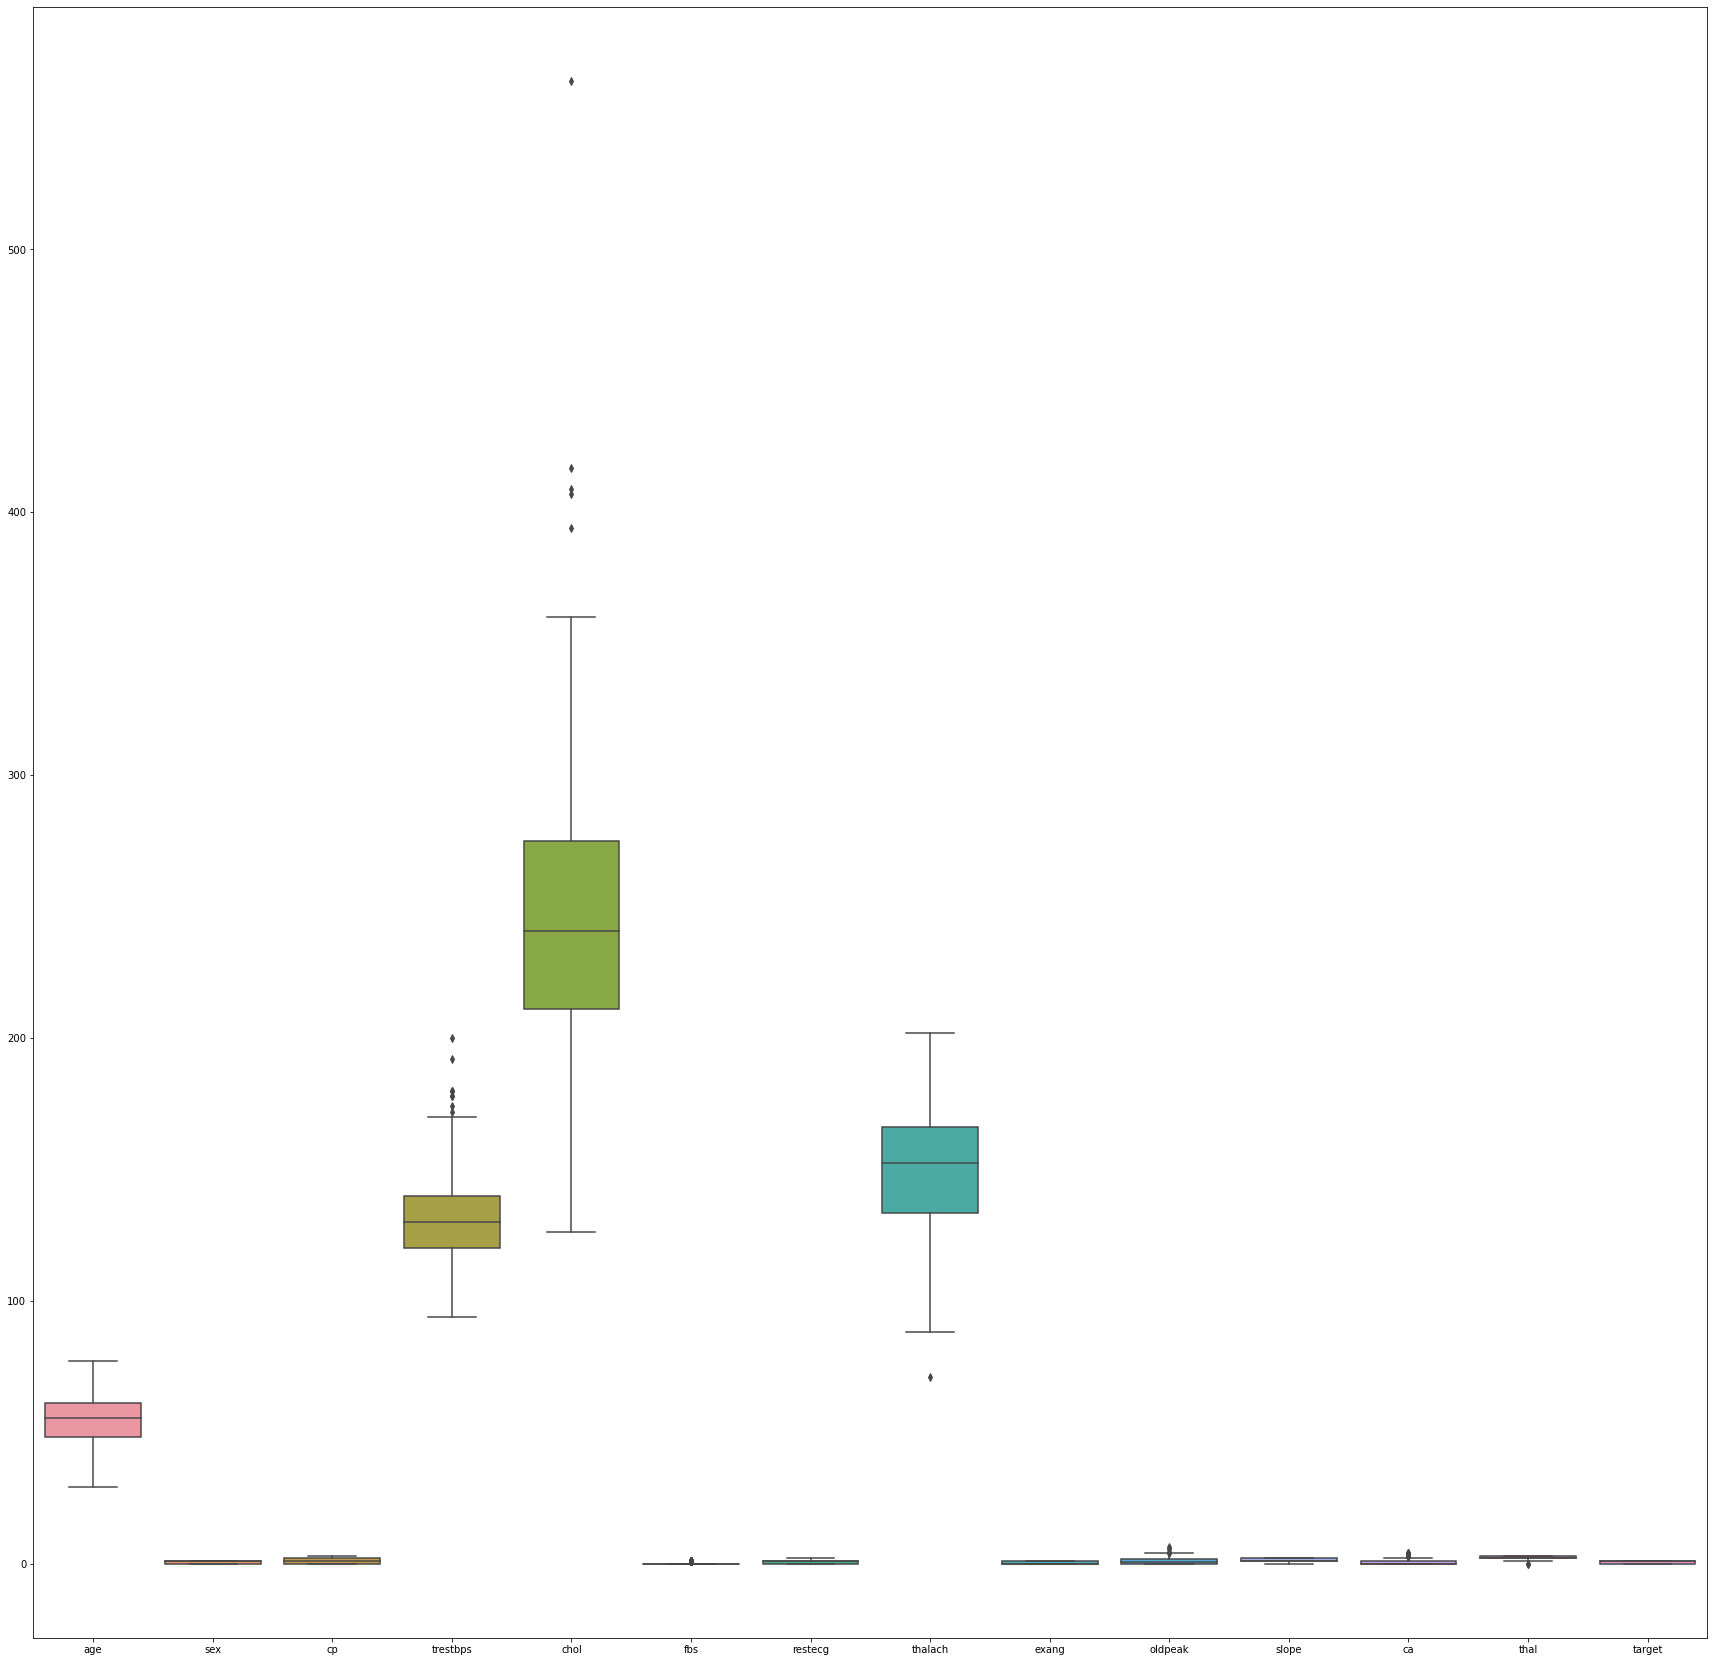

In [65]:
fig=plt.figure(figsize=(30,30))
sns.boxplot(data=df[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']])

### box plot to see outliers

In [66]:
import sklearn
import pandas as pd
  
''' Detection '''
# IQR
Q1 = np.percentile(df[['trestbps','chol','thalach']], 25, 
                   interpolation = 'midpoint') 
  
Q3 = np.percentile(df[['trestbps','chol','thalach']], 75,
                   interpolation = 'midpoint') 
IQR = Q3 - Q1 
  
print("Old Shape: ", df.shape) 
  
# Upper bound
upper = np.where(df[['trestbps','chol','thalach']] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(df[['trestbps','chol','thalach']] <= (Q1-1.5*IQR))
  
''' Removing the Outliers '''
df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)
  
print("New Shape: ", df.shape) 

Old Shape:  (302, 14)
New Shape:  (289, 14)


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


### defining x and y

In [67]:
x=df.drop(['target'],axis=1)
y=df.target

### train test split

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)

In [70]:
print('number of test sample:',x_test.shape[0])
print('number of training sample:',x_train.shape[0])

number of test sample: 87
number of training sample: 202


### feature selection using correlation coefficient

In [71]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)

    return col_corr

In [72]:
corr_features = correlation(x_train,0.85)
len(set(corr_features))

0

# logistic regression

In [73]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,roc_auc_score
accuracy = accuracy_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
roc_auc = roc_auc_score(y_test,y_pred)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [74]:
print('Accuracy is :',accuracy)
print('F1 score is :', f1)
print('Precision is :',precision)
print('Recall is :',recall)
print('Roc Auc is :',roc_auc)

Accuracy is : 0.8390804597701149
F1 score is : 0.8478260869565216
Precision is : 0.7647058823529411
Recall is : 0.9512195121951219
Roc Auc is : 0.8451749734888653


In [75]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[34 12]
 [ 2 39]]


# Naive Bayes

In [76]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
estimators=[]
results=0
from sklearn.model_selection import StratifiedKFold
estimators.append(('standardize',StandardScaler()))
estimators.append(('naive_bayes',BernoulliNB()))
model=Pipeline(estimators)
seed=1
param_grid=[{'naive_bayes__alpha':[0.0001,0.00001,0.001,0.003,0.01,0.03,0.1,0.3,1]}]
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=seed)
grid=GridSearchCV(model,param_grid,cv=kfold,scoring='accuracy')
grid.fit(x_train,y_train)
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)
print(accuracy_score(y_test,grid.predict(x_test)))

0.8162195121951219
{'naive_bayes__alpha': 0.0001}
Pipeline(steps=[('standardize', StandardScaler()),
                ('naive_bayes', BernoulliNB(alpha=0.0001))])
0.8160919540229885


In [77]:
model=BernoulliNB(alpha=0.0001)
model.fit(x_train,y_train)
y_pred_navie=model.predict(x_test)
accuracy_navie=accuracy_score(y_test,y_pred_navie)
f1_navie = f1_score(y_test,y_pred_navie)
precision_navie = precision_score(y_test,y_pred_navie)
recall_navie = recall_score(y_test,y_pred_navie)
roc_auc_navie = roc_auc_score(y_test,y_pred_navie)

In [78]:
print('Accuracy is :',accuracy_navie)
print('F1 score is :', f1_navie)
print('Precision is :',precision_navie)
print('Recall is :',recall_navie)
print('Roc Auc is :',roc_auc_navie)

Accuracy is : 0.8045977011494253
F1 score is : 0.8045977011494252
Precision is : 0.7608695652173914
Recall is : 0.8536585365853658
Roc Auc is : 0.8072640509013785


In [79]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred_navie))

[[35 11]
 [ 6 35]]


# Decision tree

In [80]:
from time import time
from scipy.stats import randint as sp_randint
from sklearn.model_selection import GridSearchCV
import numpy as np

In [81]:
# create function to generate model report
def report(results, n_top=3):
    for i in range(1, n_top+1):
        candidates = np.flatnonzero(results['rank_test_score']==i)
        for candidate in candidates:
            print('Model with rank: {0}'.format(i))
            print('Mean validation score: {0: .3f} (std: {1: .3f})'.format(results['mean_test_score'][candidate],
                                                                           results['std_test_score'][candidate]))
            print('Parameters: {0}'.format(results['params'][candidate]))
            print("")

In [82]:
# Use a full grid of mentioned parameters
param_grid = {'max_depth': [3,None],
              'max_features': [1,3,10],
              'min_samples_split': [2,3,10],
              'criterion': ['gini','entropy']}

In [83]:
# Run grid search
grid_search = GridSearchCV(dt, param_grid = param_grid,cv = 5)

In [84]:
start = time()
grid_search.fit(x_train,y_train)
print('GridSearchCV took %.2f seconds for %d candidates parameter settings.' 
      %((time()-start), len(grid_search.cv_results_['params'])))
report(grid_search.cv_results_)

GridSearchCV took 2.65 seconds for 36 candidates parameter settings.
Model with rank: 1
Mean validation score:  0.768 (std:  0.056)
Parameters: {'criterion': 'entropy', 'max_depth': 3, 'max_features': 1, 'min_samples_split': 3}

Model with rank: 2
Mean validation score:  0.767 (std:  0.060)
Parameters: {'criterion': 'gini', 'max_depth': 3, 'max_features': 10, 'min_samples_split': 10}

Model with rank: 3
Mean validation score:  0.767 (std:  0.033)
Parameters: {'criterion': 'gini', 'max_depth': 3, 'max_features': 3, 'min_samples_split': 10}



In [85]:
from sklearn import tree
dt_grid_search=tree.DecisionTreeClassifier(criterion='gini', max_features='auto',min_samples_split=10,min_samples_leaf = 5,
                                             max_depth = 3)
dt_grid_search.fit(x_train,y_train)
y_pred_decision=dt_grid_search.predict(x_test)
from sklearn import metrics
accuracy_decision=accuracy_score(y_test,y_pred_decision)
f1_decision = f1_score(y_test,y_pred_decision)
precision_decision = precision_score(y_test,y_pred_decision)
recall_decision = recall_score(y_test,y_pred_decision)
roc_auc_decision = roc_auc_score(y_test,y_pred_decision)

In [86]:
print('Accuracy is :',accuracy_decision)
print('F1 score is :', f1_decision)
print('Precision is :',precision_decision)
print('Recall is :',recall_decision)
print('Roc Auc is :',roc_auc_decision)

Accuracy is : 0.7586206896551724
F1 score is : 0.7835051546391752
Precision is : 0.6785714285714286
Recall is : 0.926829268292683
Roc Auc is : 0.767762460233298


In [87]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred_decision))

[[28 18]
 [ 3 38]]


# Randomforest

In [125]:
rf=RandomForestClassifier()

In [126]:
from time import time
from scipy.stats import randint as sp_randint
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

In [127]:
# create function to generate model report
def report(results, n_top=3):
    for i in range(1, n_top+1):
        candidates = np.flatnonzero(results['rank_test_score']==i)
        for candidate in candidates:
            print('Model with rank: {0}'.format(i))
            print('Mean validation score: {0: .3f} (std: {1: .3f})'.format(results['mean_test_score'][candidate],
                                                                           results['std_test_score'][candidate]))
            print('Parameters: {0}'.format(results['params'][candidate]))
            print("")

In [128]:
param_dist = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'criterion': ['gini','entropy'],
    'min_samples_split': [8, 10, 12]}

In [129]:
n_iter_search=20
random_search=RandomizedSearchCV(rf,param_distributions=param_dist,n_iter=n_iter_search,cv=5)

In [130]:
start=time()
random_search.fit(x_train,y_train)
print('Randomized search too %.2f seconds for %d candidates' 'parameter setting.'%((time()-start),n_iter_search))
report(random_search.cv_results_)

Randomized search too 45.66 seconds for 20 candidatesparameter setting.
Model with rank: 1
Mean validation score:  0.812 (std:  0.024)
Parameters: {'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 2, 'max_depth': 110, 'criterion': 'entropy', 'bootstrap': True}

Model with rank: 2
Mean validation score:  0.807 (std:  0.029)
Parameters: {'min_samples_split': 8, 'min_samples_leaf': 4, 'max_features': 2, 'max_depth': 100, 'criterion': 'entropy', 'bootstrap': True}

Model with rank: 3
Mean validation score:  0.802 (std:  0.014)
Parameters: {'min_samples_split': 12, 'min_samples_leaf': 3, 'max_features': 2, 'max_depth': 90, 'criterion': 'entropy', 'bootstrap': True}



In [147]:
# Ques 5) Build a random forest classifier
# Creating a random forest classifier
clf_rf = RandomForestClassifier(n_estimators = 150, criterion = 'entropy', 
                                min_samples_split = 7 , min_samples_leaf = 7, max_features = 'auto',
                                random_state = 500, max_depth = 12) 
clf_fit_random = clf_rf.fit(x_train, y_train) 
y_pred_random = clf_fit_random.predict(x_test)
from sklearn import metrics
accuracy_random=accuracy_score(y_test,y_pred_random)
f1_random = f1_score(y_test,y_pred_random)
precision_random = precision_score(y_test,y_pred_random)
recall_random = recall_score(y_test,y_pred_random)
roc_auc_random = roc_auc_score(y_test,y_pred_random)

In [148]:
print('Accuracy is :',accuracy_random)
print('F1 score is :', f1_random)
print('Precision is :',precision_random)
print('Recall is :',recall_random)
print('Roc Auc is :',roc_auc_random)

Accuracy is : 0.8620689655172413
F1 score is : 0.8695652173913043
Precision is : 0.7843137254901961
Recall is : 0.975609756097561
Roc Auc is : 0.8682396606574763


In [149]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred_random))

[[35 11]
 [ 1 40]]


# Support Vector Machine

In [156]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
svm_grid = RandomizedSearchCV(SVC(), param_grid)  
svm_fit_svm=svm_grid.fit(x_train, y_train) 
svm_fit_svm

RandomizedSearchCV(estimator=SVC(),
                   param_distributions={'C': [0.1, 1, 10, 100, 1000],
                                        'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                                        'kernel': ['rbf']})

In [157]:
# print best parameter after tuning 
print(svm_grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(svm_grid.best_estimator_) 

{'kernel': 'rbf', 'gamma': 0.0001, 'C': 1000}
SVC(C=1000, gamma=0.0001)


In [158]:
y_pred_svm=svm_grid.predict(x_test)
from sklearn import metrics
accuracy_svm=accuracy_score(y_test,y_pred_svm)
f1_svm= f1_score(y_test,y_pred_svm)
precision_svm = precision_score(y_test,y_pred_svm)
recall_svm = recall_score(y_test,y_pred_svm)
roc_auc_svm = roc_auc_score(y_test,y_pred_svm)

In [159]:
print('Accuracy is :',accuracy_svm)
print('F1 score is :', f1_svm)
print('Precision is :',precision_svm)
print('Recall is :',recall_svm)
print('Roc Auc is :',roc_auc_svm)

Accuracy is : 0.7241379310344828
F1 score is : 0.7446808510638298
Precision is : 0.660377358490566
Recall is : 0.8536585365853658
Roc Auc is : 0.7311770943796394


# comparing all the models

In [160]:
df = pd.DataFrame()
df['Model'] = ['logistic','naive bayes','decision','randomforest','support vector machine']
df['roc_auc_score'] = [roc_auc,roc_auc_navie,roc_auc_decision,roc_auc_random,roc_auc_svm]
df['accuracy']=[accuracy,accuracy_navie,accuracy_decision,accuracy_random,accuracy_svm]

In [161]:
df

,Model,roc_auc_score,accuracy
0,logistic,0.845175,0.839080
1,naive bayes,0.807264,0.804598
2,decision,0.767762,0.758621
3,randomforest,0.868240,0.862069
4,support vector machine,0.731177,0.724138


### Ans= With RandomForest we get best accuracy-0.86 and best roc_auc_score-0.86